In [1]:
try:
    %tensorflow_version 2.x
except Exception:
    pass

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

# tensorflow와 tf.keras를 import
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import random

print(tf.__version__)

2.1.0


In [3]:
file_path = "../feature/feature_fbank_20s/"
class_names = os.listdir(file_path)
class_names.sort()

print(class_names)

['2017019740001_kwakjuheon', '2017019740002_kimjiho', '2017019740003_songyejin', '2017019740004_parksohui', '2017019740005_moonyeonwoo', '2017019740006_kangsubin', '2017019740007_leekyeongeun', '2017019740008_chochaeyeon', '2017019740009_shindonghwan', '2017019740010_kwakmirae', '2017019740011_kimhyeryeong', '2017019740012_chaeminjoon', '2017019740013_kwakyiheon', '2017019740014_leesumin', '2017019740015_choihayoung', '2017019740016_kangyeseo', '2017019740017_kwakmihyang', '2017019740018_eundano', '2017019740019_limjinju', '2017019740020_kimseongje', '2017019740021_kwakbokyeong', '2017019740022_ahnhyojin', '2017019740023_heosehun', '2017019740024_choijiwon', '2017019740025_ahnjeongsuk', '2017019740026_parkyeongseon', '2017019740027_kwaksangpil', '2017019740028_kodohyeon', '2017019740029_limdonggeun', '2017019740030_kanghyeyeon', '2017019740031_jominseok', '2017019770001_kwonyuna', '2017019770002_kwoneunkyung', '2017019770003_johaesu', '2017019770004_leebyeongjin', '2017019770005_hyeons

In [4]:
x_list = []
y_list = []

for i in range(0,len(class_names)):
    files=os.listdir(file_path+class_names[i])
    files = [file for file in files if file.endswith(".npy")]

    for j in range(0, len(files)):

        x = np.load(file_path+class_names[i]+"/"+files[j])
        x=x.T
        x_list.append(x)
        y_list.append(i)


In [5]:
x_train = np.array(x_list)
y_train = np.array(y_list)

print("x_train:", x_train.shape)
print("y_train:", y_train.shape)

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, stratify=y_train, test_size=0.2, random_state=42)

x_train: (575, 594, 40)
y_train: (575,)


In [6]:
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_val:", x_val.shape)
print("y_val:", y_val.shape)

x_train: (460, 594, 40)
y_train: (460,)
x_val: (115, 594, 40)
y_val: (115,)


In [7]:
from tensorflow.keras.utils import to_categorical
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

In [8]:
x_train = x_train.reshape(-1, x_train.shape[1], x_train.shape[2], 1)
x_val   = x_val.reshape(-1, x_val.shape[1], x_val.shape[2], 1)

In [9]:
print("x_train:", x_train.shape)
print("y_train:", y_train_encoded.shape)
print("x_val:", x_val.shape)
print("y_val:", y_val_encoded.shape)

x_train: (460, 594, 40, 1)
y_train: (460, 115)
x_val: (115, 594, 40, 1)
y_val: (115, 115)


In [10]:
#print(np.min(x_train), np.max(x_train))
#x_train = x_train - np.min(x_train)

#print(np.min(x_train), np.max(x_train))
#x_train = x_train / np.max(x_train)

#print(np.min(x_train), np.max(x_train))

#print(np.min(x_val), np.max(x_val))
#x_val = x_val - np.min(x_val)

#print(np.min(x_val), np.max(x_val))
#x_val = x_val / np.max(x_val)

#print(np.min(x_val), np.max(x_val))

In [11]:
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()

#nsamples, nx, ny, nz= x_train.shape
#x_train_nor = scaler.fit_transform(x_train.reshape((nsamples,nx*ny*nz)))
#x_train_nor = x_train_nor.reshape((nsamples,nx,ny,nz))

#nsamples, nx, ny, nz= x_val.shape
#x_val_nor = scaler.transform(x_val.reshape((nsamples,nx*ny*nz)))
#x_val_nor = x_val_nor.reshape((nsamples,nx,ny,nz))


In [12]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, BatchNormalization, MaxPool2D
from tensorflow.keras.layers import Dropout, Input, Reshape, Bidirectional, LSTM, Flatten
from tensorflow.keras.models import Model

In [13]:
input_shape=(x_train.shape[1], x_train.shape[2], 1)

visible = Input(shape=input_shape)

hidden= Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding='same', name='conv1_1')(visible)
hidden= Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding='same', name='conv1_2')(hidden)
hidden= MaxPool2D(pool_size=(2, 2), strides=(2, 2), name='pool1', padding='same')(hidden)

hidden= Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding='same', name='conv2_1')(hidden)
hidden= MaxPool2D(pool_size=(2, 2), strides=(2, 2), name='pool2', padding='same')(hidden)

hidden= Conv2D(128, (3, 3), strides=(1, 1), activation='relu', padding='same', name='conv3_1')(hidden)
hidden= BatchNormalization(name='batchnorm1')(hidden)
hidden= MaxPool2D(pool_size=(2, 2), strides=(1, 2), name='pool3', padding='valid')(hidden)

hidden= Conv2D(128, (2, 2), strides=(1, 1), activation='relu', padding='valid', name='conv4_1')(hidden)
hidden= BatchNormalization(name='batchnorm2')(hidden)
hidden= MaxPool2D(pool_size=(2, 2), strides=(1, 2), name='pool4', padding='valid')(hidden)

#hidden= Conv2D(128, (2, 2), strides=(1, 1), activation='relu', padding='valid', name='conv5_1')(hidden)
#hidden= BatchNormalization(name='batchnorm3')(hidden)
#hidden= MaxPool2D(pool_size=(2, 2), strides=(1, 2), name='pool5', padding='valid')(hidden)

hidden= Conv2D(128, (2, 2), strides=(1, 1), activation='relu', padding='valid', name='conv6_1')(hidden)
#hidden= MaxPool2D(pool_size=(2, 2), strides=(1, 2), name='pool6', padding='valid')(hidden)
hidden = Reshape((hidden.shape[1]*hidden.shape[2],128))(hidden)

hidden= LSTM(64, return_sequences=True)(hidden)
hidden= LSTM(64, return_sequences=True)(hidden)
hidden= Dropout(0.2)(hidden)
hidden= LSTM(32, return_sequences=True)(hidden)
hidden= LSTM(32, return_sequences=True)(hidden)
hidden= Flatten()(hidden)
#hidden = Dense(64, activation='relu')(hidden)

output = Dense(len(class_names), activation="softmax")(hidden)

model = Model(visible, output)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 594, 40, 1)]      0         
_________________________________________________________________
conv1_1 (Conv2D)             (None, 594, 40, 64)       640       
_________________________________________________________________
conv1_2 (Conv2D)             (None, 594, 40, 64)       36928     
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 297, 20, 64)       0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 297, 20, 64)       36928     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 149, 10, 64)       0         
_________________________________________________________________
conv3_1 (Conv2D)             (None, 149, 10, 128)      73856 

In [15]:
model.compile(optimizer=keras.optimizers.SGD(lr=0.05, momentum=0.0, decay=0.0, nesterov=False), loss=tf.keras.losses.categorical_crossentropy, metrics=["accuracy"])

In [16]:
history = model.fit(x_train, y_train_encoded, batch_size=4, epochs=100, verbose=1, validation_data=(x_val, y_val_encoded))

Train on 460 samples, validate on 115 samples
Epoch 1/100
460/460 [==============================] - 8s 17ms/sample - loss: 4.6831 - accuracy: 0.0152 - val_loss: 4.9700 - val_accuracy: 0.0087
Epoch 2/100
460/460 [==============================] - 4s 8ms/sample - loss: 4.1850 - accuracy: 0.0435 - val_loss: 4.0705 - val_accuracy: 0.0435
Epoch 3/100
460/460 [==============================] - 4s 9ms/sample - loss: 3.5659 - accuracy: 0.0935 - val_loss: 5.1166 - val_accuracy: 0.0435
Epoch 4/100
460/460 [==============================] - 4s 8ms/sample - loss: 2.8669 - accuracy: 0.2587 - val_loss: 5.9355 - val_accuracy: 0.0348
Epoch 5/100
460/460 [==============================] - 4s 9ms/sample - loss: 2.1151 - accuracy: 0.4043 - val_loss: 5.3795 - val_accuracy: 0.0348
Epoch 6/100
460/460 [==============================] - 4s 9ms/sample - loss: 1.5313 - accuracy: 0.5630 - val_loss: 3.7849 - val_accuracy: 0.2087
Epoch 7/100
460/460 [==============================] - 4s 9ms/sample - loss: 1.0753

Epoch 57/100
460/460 [==============================] - 6s 12ms/sample - loss: 0.0260 - accuracy: 0.9913 - val_loss: 1.4427 - val_accuracy: 0.6870
Epoch 58/100
460/460 [==============================] - 4s 8ms/sample - loss: 0.0176 - accuracy: 0.9913 - val_loss: 1.3961 - val_accuracy: 0.7043
Epoch 59/100
460/460 [==============================] - 5s 12ms/sample - loss: 0.0257 - accuracy: 0.9870 - val_loss: 1.3708 - val_accuracy: 0.6957
Epoch 60/100
460/460 [==============================] - 6s 12ms/sample - loss: 0.0169 - accuracy: 0.9891 - val_loss: 1.4857 - val_accuracy: 0.6696
Epoch 61/100
460/460 [==============================] - 4s 9ms/sample - loss: 0.0180 - accuracy: 0.9935 - val_loss: 1.4092 - val_accuracy: 0.6957
Epoch 62/100
460/460 [==============================] - 5s 10ms/sample - loss: 0.0245 - accuracy: 0.9870 - val_loss: 1.4319 - val_accuracy: 0.6783
Epoch 63/100
460/460 [==============================] - 4s 10ms/sample - loss: 0.0176 - accuracy: 0.9935 - val_loss: 1.4

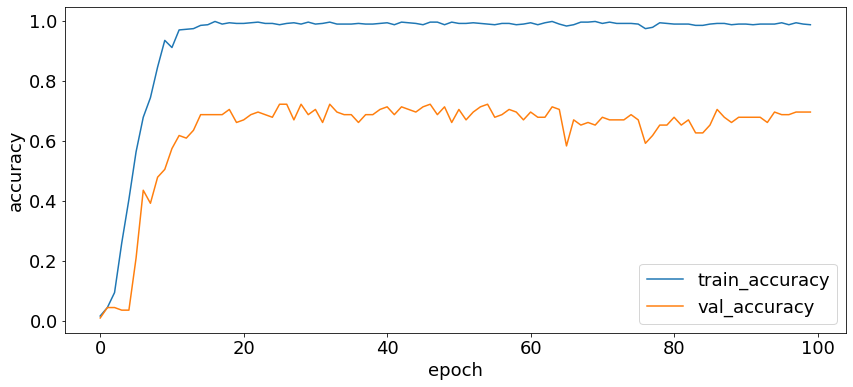

In [17]:
plt.figure(figsize=(14, 6))
plt.rc('font', size=18)

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train_accuracy", "val_accuracy"])
plt.show()

In [18]:
from sklearn.metrics import accuracy_score

val_file_path = "../feature/feature_fbank_20s_validation/"
x_validation_list=[]
y_validation_list=[]

val_class_names = os.listdir(val_file_path)
val_class_names.sort()

for i in range(0,len(val_class_names)):
    val_files=os.listdir(val_file_path+val_class_names[i])
    val_files = [file for file in val_files if file.endswith(".npy")]

    for j in range(0, len(val_files)):
        x = np.load(val_file_path+val_class_names[i]+"/"+val_files[j])
        x=x.T
        x_validation_list.append(x)
        y_validation_list.append(i)


x_validation = np.array(x_validation_list)
y_validation = np.array(y_validation_list)
y_validation_encoded = tf.keras.utils.to_categorical(y_validation)

x_validation = x_validation.reshape(-1, x_validation.shape[1], x_validation.shape[2], 1)


#x_validation = x_validation - np.min(x_validation)
#x_validation = x_validation / np.max(x_validation)
real =[]
pred_out_idex=[]

for k in range(0, len(x_validation)):
    
    kt = x_validation[k].reshape(-1, x_validation.shape[1], x_validation.shape[2], 1)
    
    #nsamples, nx, ny,nz = kt.shape
    #kt = scaler.transform(kt.reshape((nsamples,nx*ny*nz)))
    #kt = kt.reshape((nsamples,nx,ny,nz))
    
    predictions_single = model.predict(kt)
    print("Predict :",class_names[np.argmax(predictions_single)],", Real :",val_class_names[y_validation[k]])
    real.append(class_names.index(val_class_names[y_validation[k]]))
    pred_out_idex.append(np.argmax(predictions_single))
    
# get the accuracy
print (accuracy_score(real, pred_out_idex))

#batch=4, epoch=50 0.5625 val_accuracy: 0.6783
#batch=16, epoch=50 0.75 val_accuracy: 0.8000
#batch=32, epoch=50 0.5625 val_accuracy: 0.7913
#batch=8, epoch=100 0.75 val_accuracy: 0.7130
#batch=16, epoch=100 0.6875 val_accuracy: 0.8000

Predict : 2017019740001_kwakjuheon , Real : 2017019740001_kwakjuheon
Predict : 2017019880038_baejaehong , Real : 2017019740001_kwakjuheon
Predict : 2017019880032_seoyeonjoo , Real : 2017019740001_kwakjuheon
Predict : 2017019770001_kwonyuna , Real : 2017019740001_kwakjuheon
Predict : 2017019740005_moonyeonwoo , Real : 2017019740001_kwakjuheon
Predict : 2017019740029_limdonggeun , Real : 2017019740029_limdonggeun
Predict : 2017019770001_kwonyuna , Real : 2017019770001_kwonyuna
Predict : 2017019770001_kwonyuna , Real : 2017019770001_kwonyuna
Predict : 2017019770001_kwonyuna , Real : 2017019770001_kwonyuna
Predict : 2017019770001_kwonyuna , Real : 2017019770001_kwonyuna
Predict : 2017019770001_kwonyuna , Real : 2017019770001_kwonyuna
Predict : 2017019880001_kimsubin , Real : 2017019880001_kimsubin
Predict : 2017019880001_kimsubin , Real : 2017019880001_kimsubin
Predict : 2017019880001_kimsubin , Real : 2017019880001_kimsubin
Predict : 2017019880001_kimsubin , Real : 2017019880001_kimsubin
